<h2>Project of regression problem</h2>

Problem description:

Goal:

Dataset: This dataset contains medical insurance cost information for 1338 individuals. It includes demographic and health-related variables such as age, sex, BMI, number of children, smoking status, and residential region in the US. The target variable is charges, which represents the medical insurance cost billed to the individual.

In [84]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np, seaborn as sb
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
from scipy import stats

<h2>Data preparation</h2>
In this stage we conduct data preparation to ensure the missing data, wrong data types and basic feature engineering are in place.

In [85]:
regression_dataset = pd.read_csv('./data/medical insurance/insurance.csv')

In [86]:
regression_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [87]:
regression_dataset.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


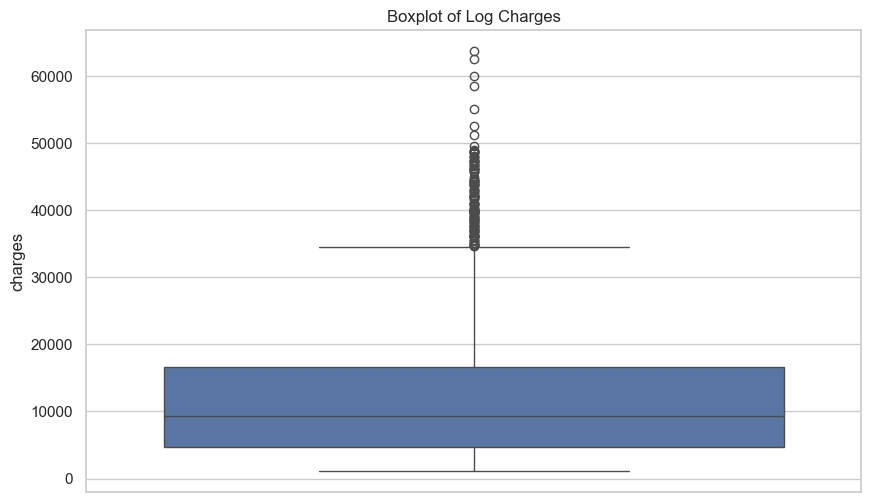

In [88]:
sb.boxplot(regression_dataset['charges'])
plt.title('Boxplot of Log Charges')
plt.show()

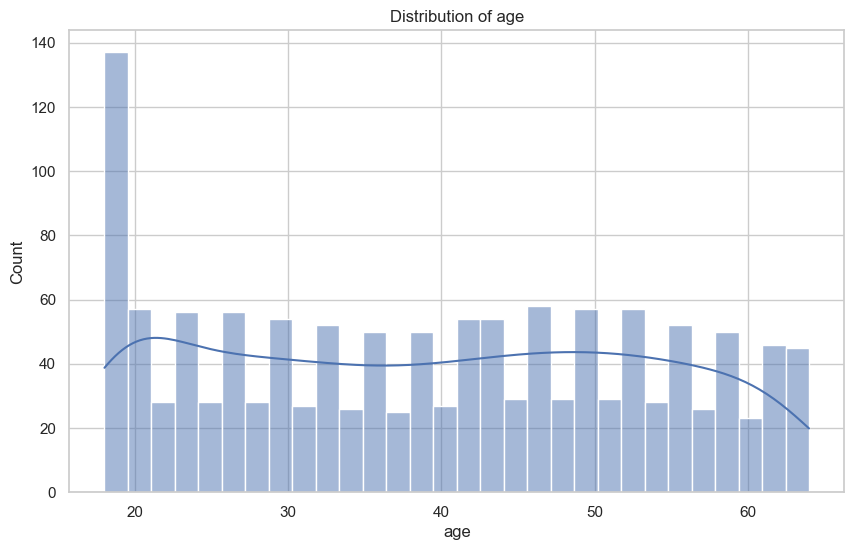

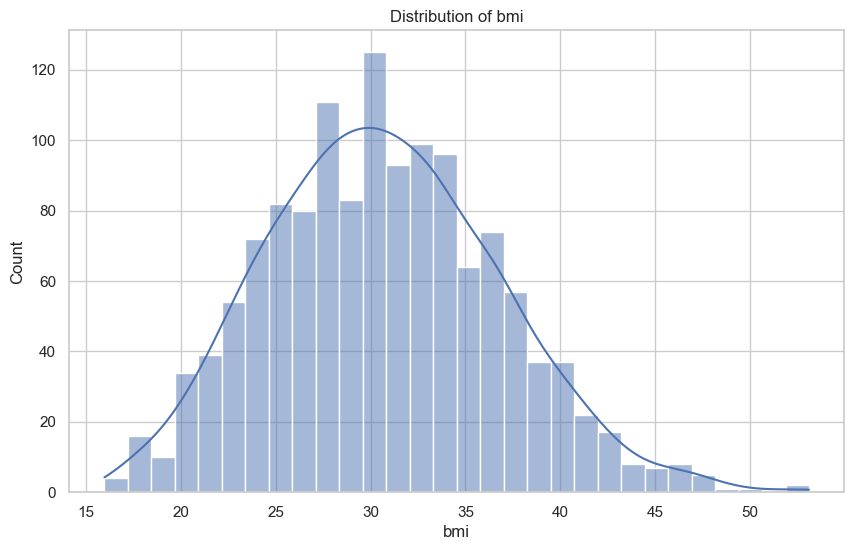

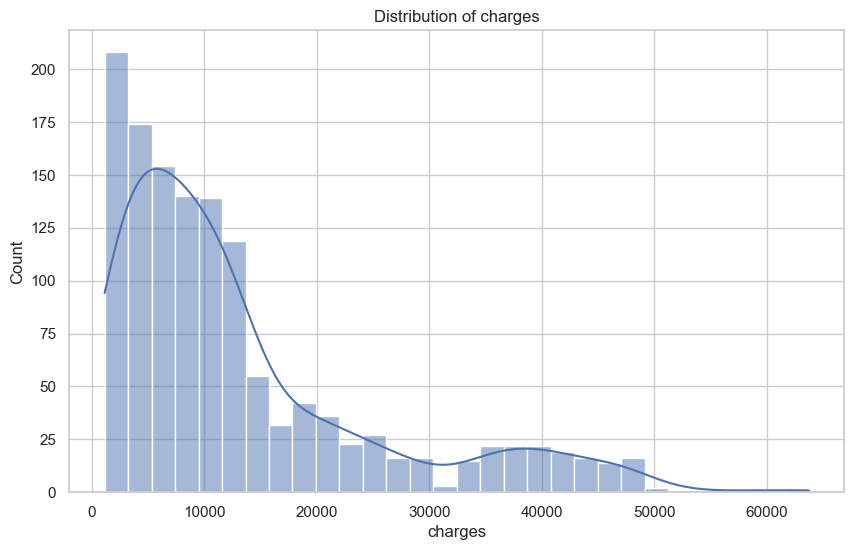

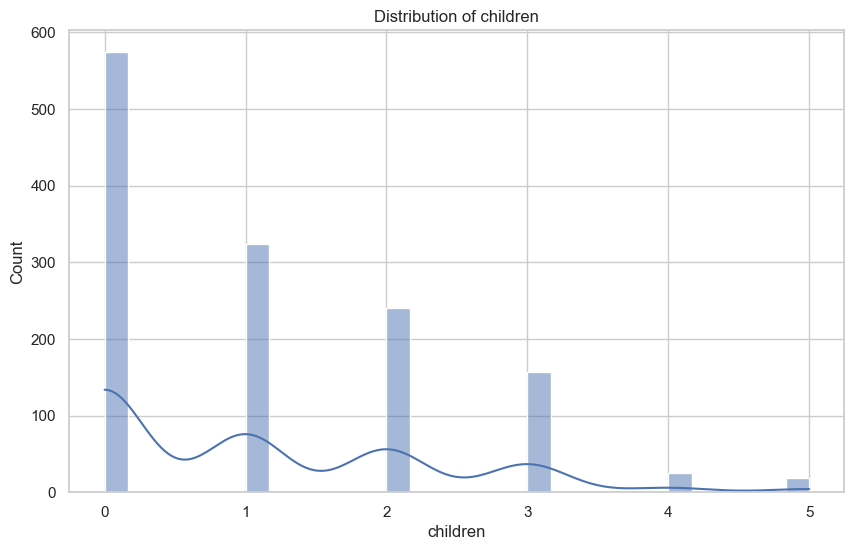

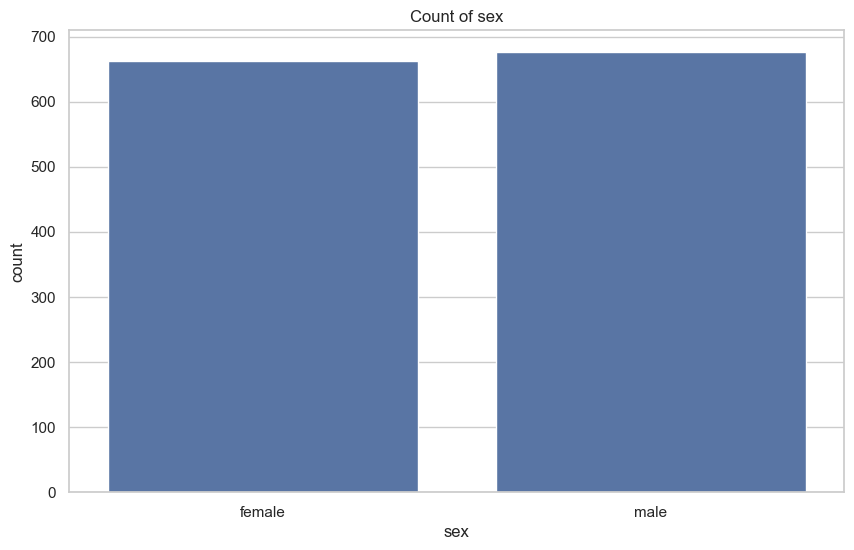

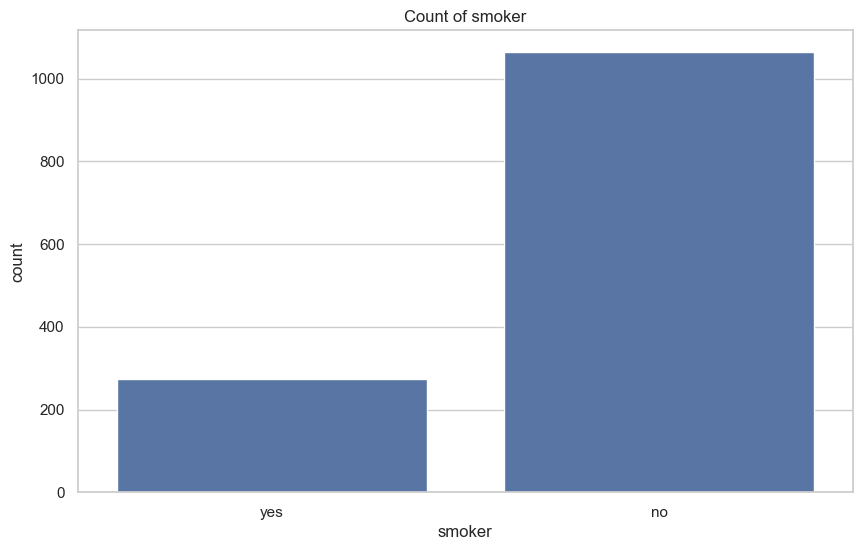

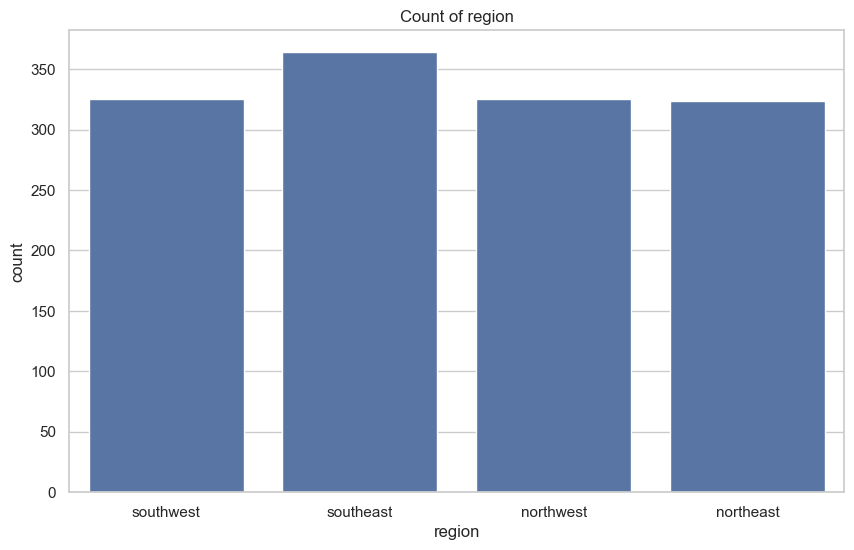

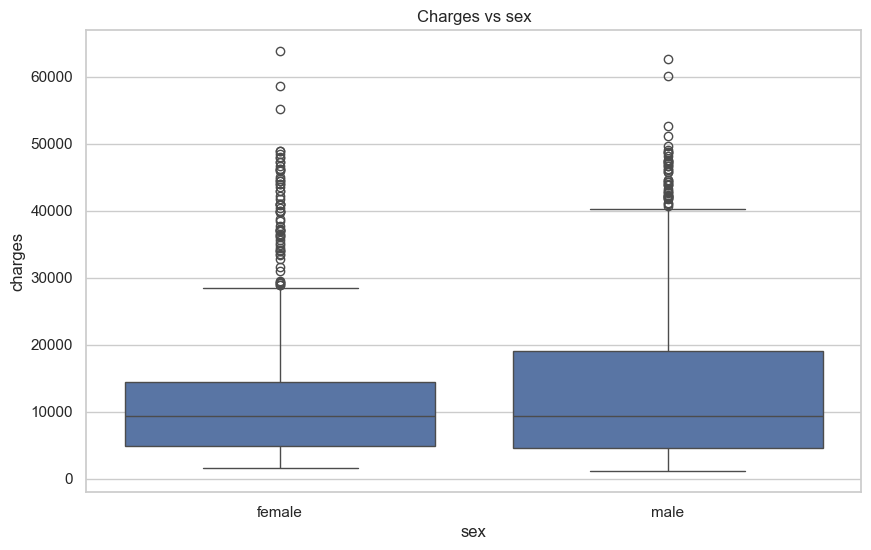

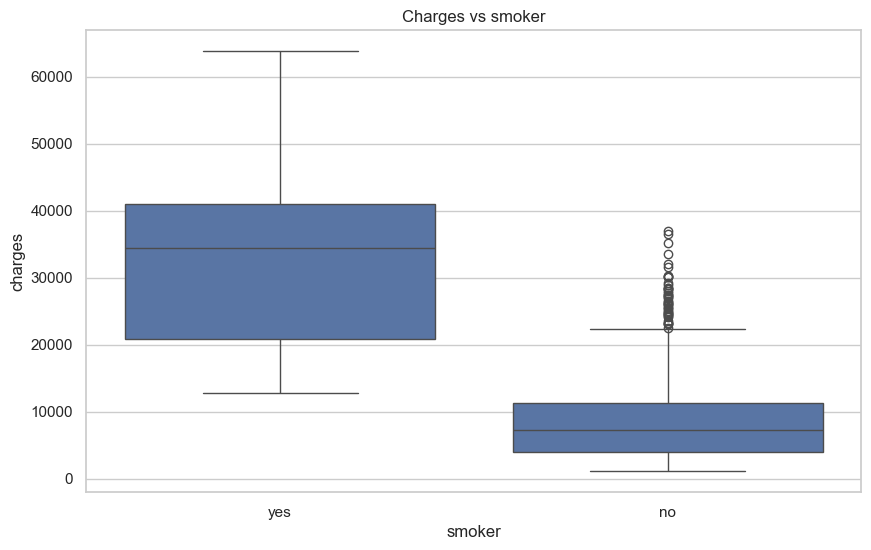

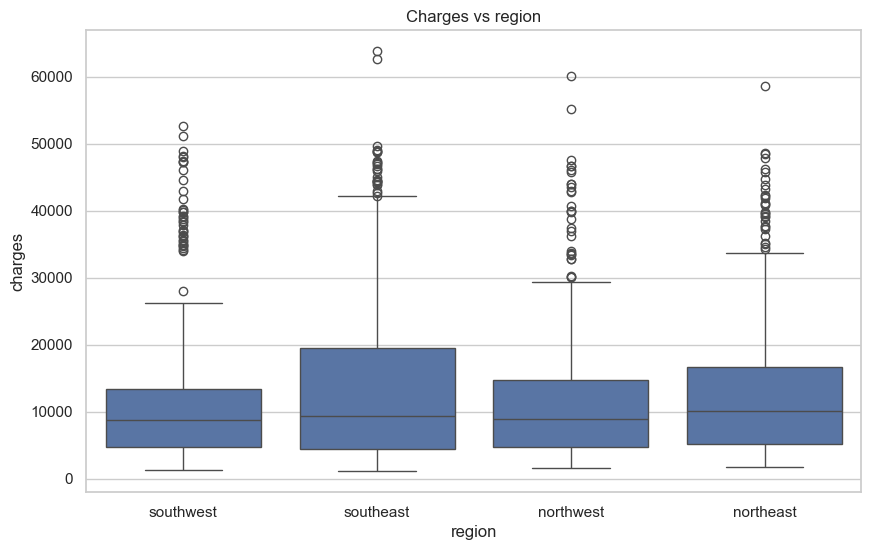

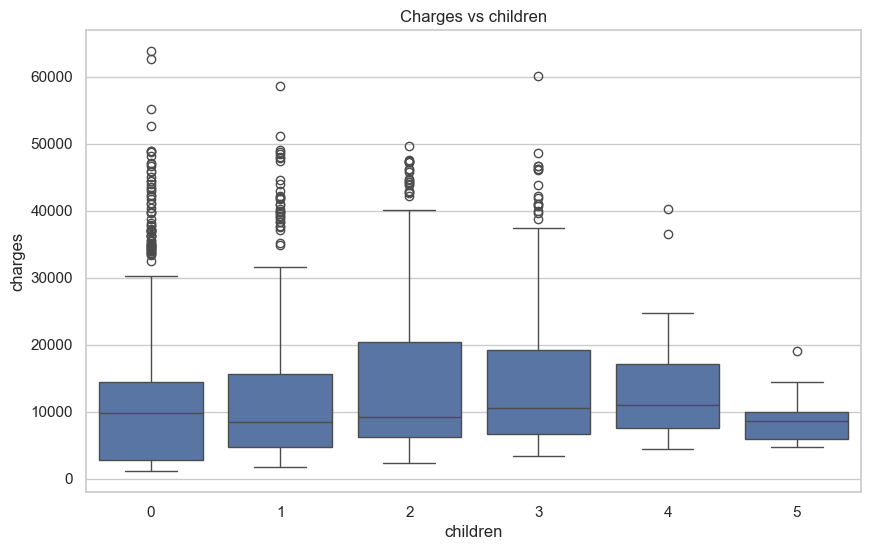

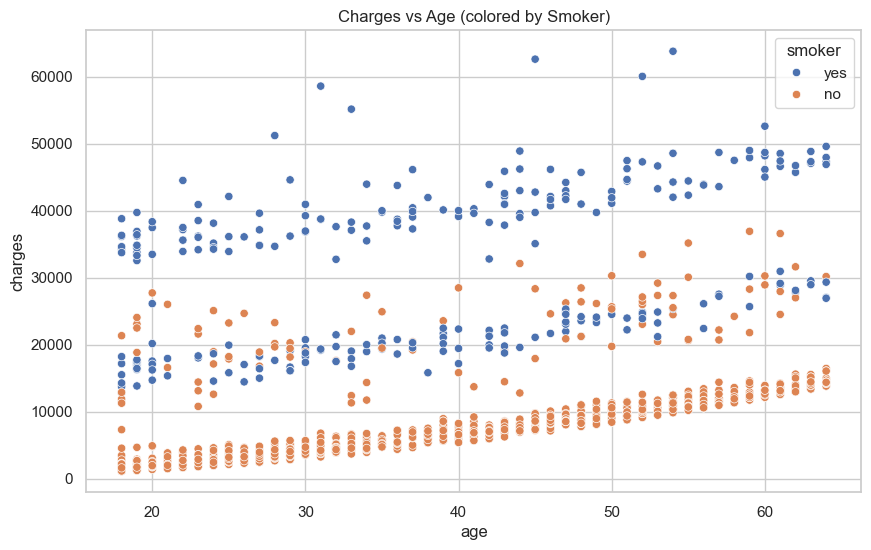

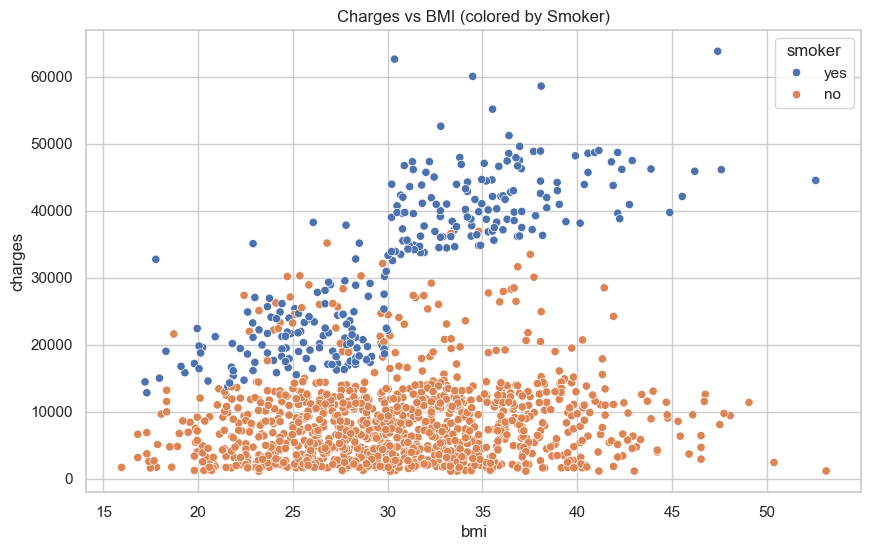

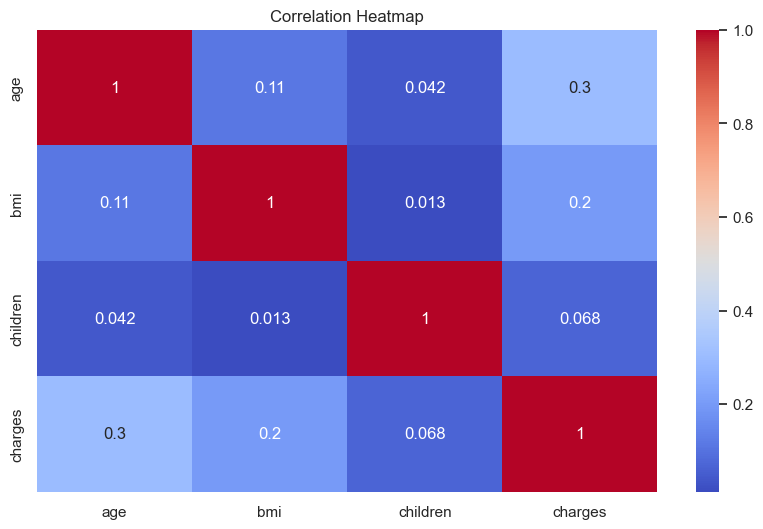

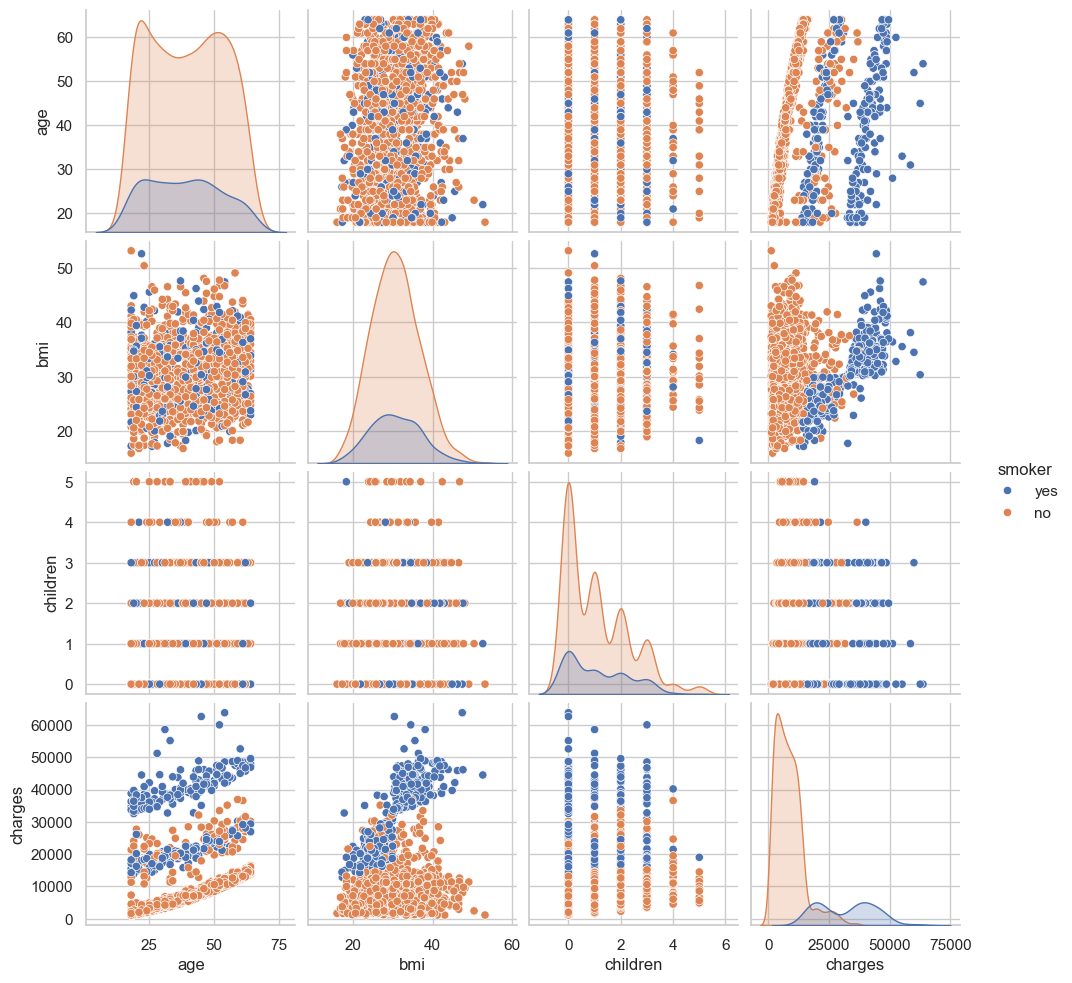

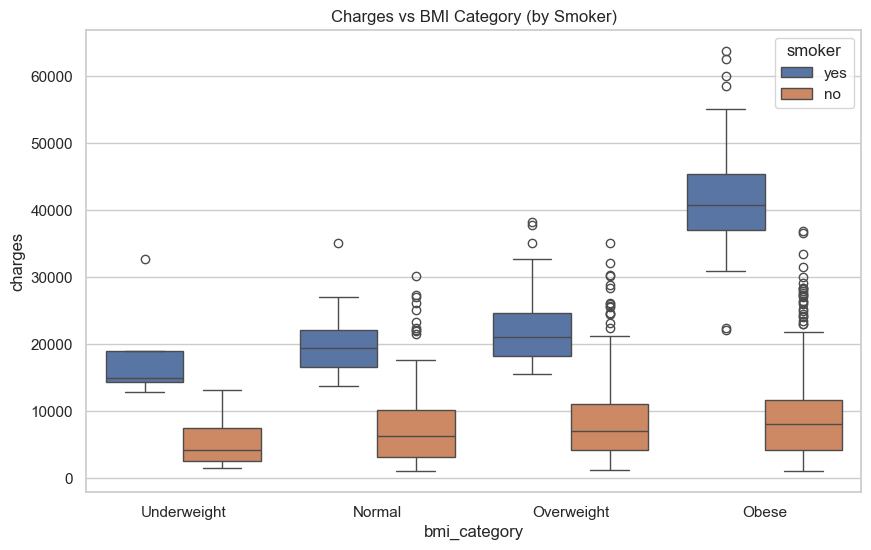

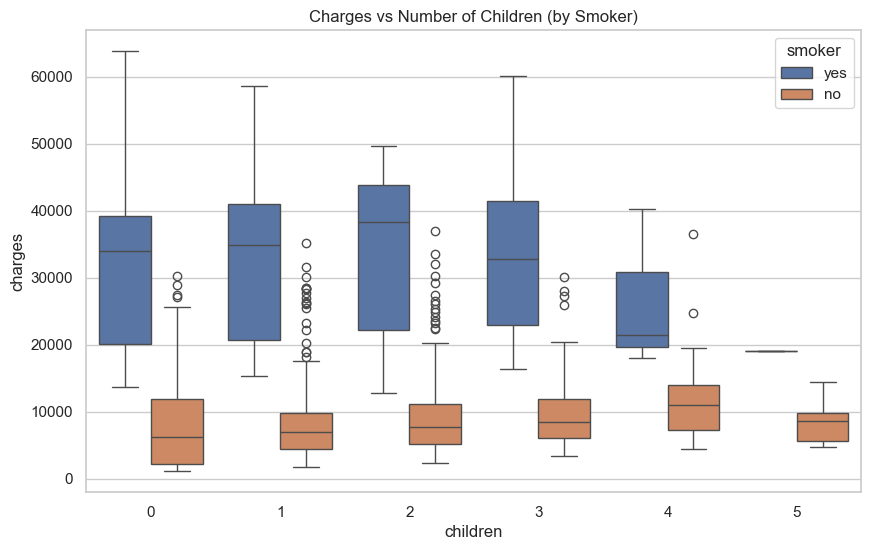

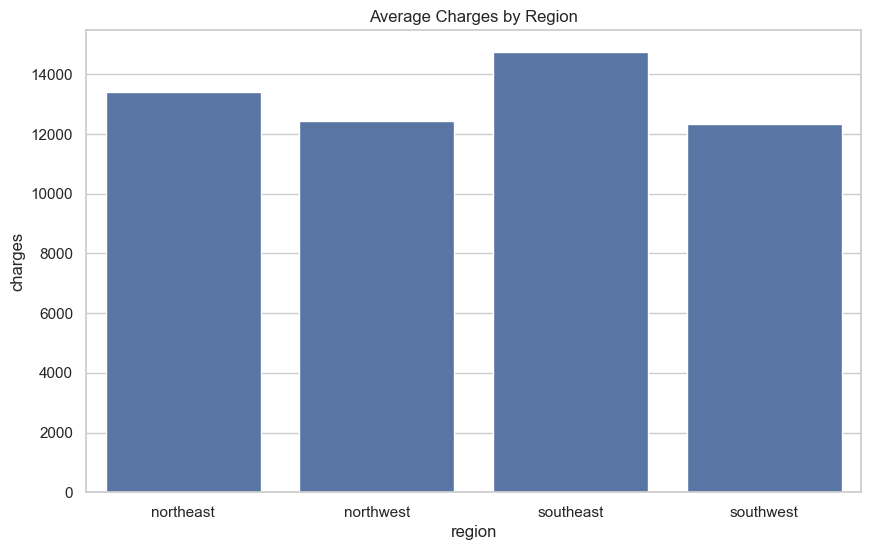

In [89]:
regression_dataset2 = pd.read_csv('./data/medical insurance/insurance.csv')

sb.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

numeric_cols = ['age', 'bmi', 'charges', 'children']
for col in numeric_cols:
    plt.figure()
    sb.histplot(regression_dataset2[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

categorical_cols = ['sex', 'smoker', 'region']
for col in categorical_cols:
    plt.figure()
    sb.countplot(x=col, data=regression_dataset2)
    plt.title(f'Count of {col}')
    plt.show()

for col in ['sex', 'smoker', 'region', 'children']:
    plt.figure()
    sb.boxplot(x=col, y='charges', data=regression_dataset2)
    plt.title(f'Charges vs {col}')
    plt.show()

plt.figure()
sb.scatterplot(x='age', y='charges', hue='smoker', data=regression_dataset2)
plt.title('Charges vs Age (colored by Smoker)')
plt.show()

plt.figure()
sb.scatterplot(x='bmi', y='charges', hue='smoker', data=regression_dataset2)
plt.title('Charges vs BMI (colored by Smoker)')
plt.show()

plt.figure()
sb.heatmap(regression_dataset2[['age','bmi','children','charges']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

sb.pairplot(regression_dataset2[['age','bmi','children','charges','smoker']], hue='smoker')
plt.show()


bins = [0, 18.5, 24.9, 29.9, 100]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
regression_dataset2['bmi_category'] = pd.cut(regression_dataset2['bmi'], bins=bins, labels=labels)

plt.figure()
sb.boxplot(x='bmi_category', y='charges', hue='smoker', data=regression_dataset2)
plt.title('Charges vs BMI Category (by Smoker)')
plt.show()

plt.figure()
sb.boxplot(x='children', y='charges', hue='smoker', data=regression_dataset2)
plt.title('Charges vs Number of Children (by Smoker)')
plt.show()

region_avg = regression_dataset2.groupby('region')['charges'].mean().reset_index()
plt.figure()
sb.barplot(x='region', y='charges', data=region_avg)
plt.title('Average Charges by Region')
plt.show()


In [90]:
regression_dataset['sex'] = regression_dataset['sex'].map({'male': 0,'female': 1})
regression_dataset['smoker'] = regression_dataset['smoker'].map({'no': 0,'yes': 1})
regression_dataset['region'] = regression_dataset['region'].map({'southwest': 0,'northwest': 1,'northeast': 2,'southeast': 3})
print(regression_dataset['region'].unique())
print(regression_dataset.isna().sum())

[0 3 1 2]
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [91]:
y = regression_dataset['charges']
X = regression_dataset.drop('charges', axis=1)

<h3>Testing log charges for skewing</h3>

In [92]:
y_log = np.log1p(y)

<h3>Extracting Polynomial Features</h3>

In [93]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
numeric_poly = ['age', 'bmi']
poly_vals = poly.fit_transform(X[numeric_poly])

poly_df = pd.DataFrame(
    poly_vals, 
    columns=poly.get_feature_names_out(numeric_poly),
    index=X.index
)
poly_df = poly_df.drop(['age', 'bmi', 'age bmi'], axis=1)

#add latter or dont xD
X = pd.concat([X, poly_df], axis=1)


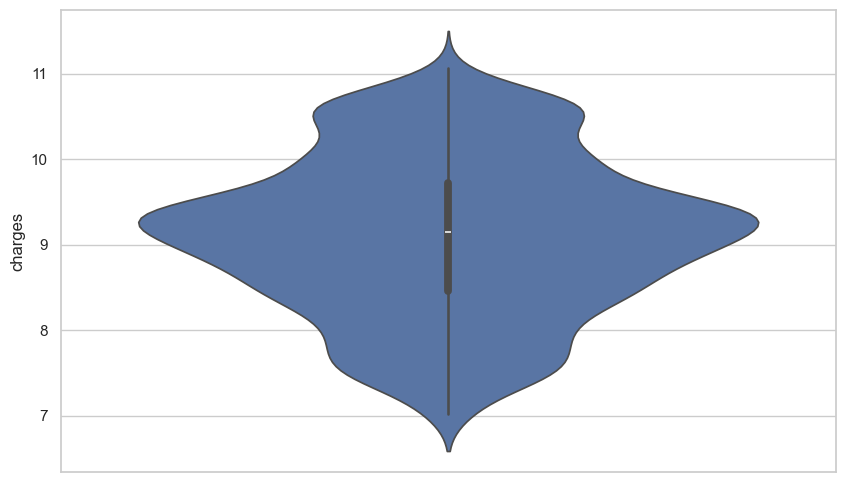

In [94]:
ax3 = sb.violinplot(data=y_log)

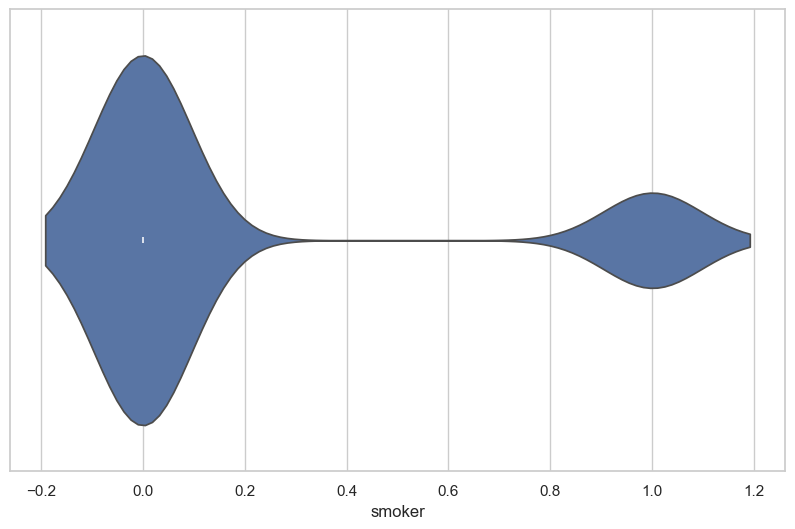

In [95]:
ax1 = sb.violinplot(x='smoker', data=regression_dataset)

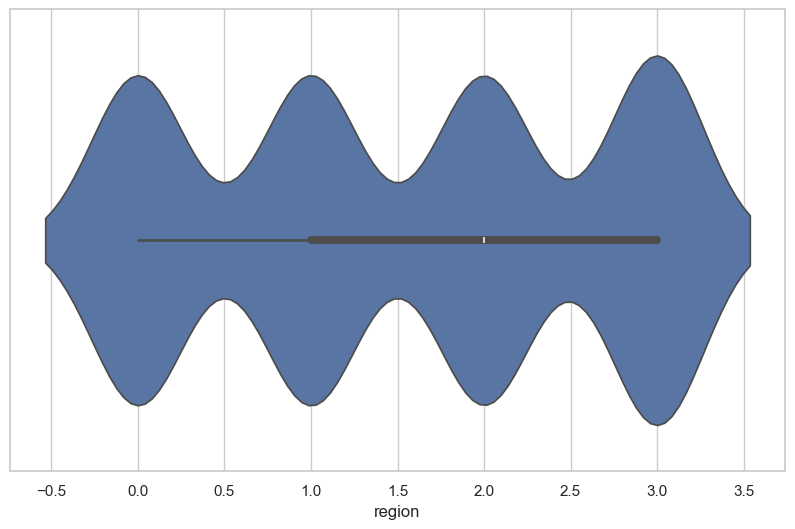

In [96]:
ax1 = sb.violinplot(x='region', data=regression_dataset)

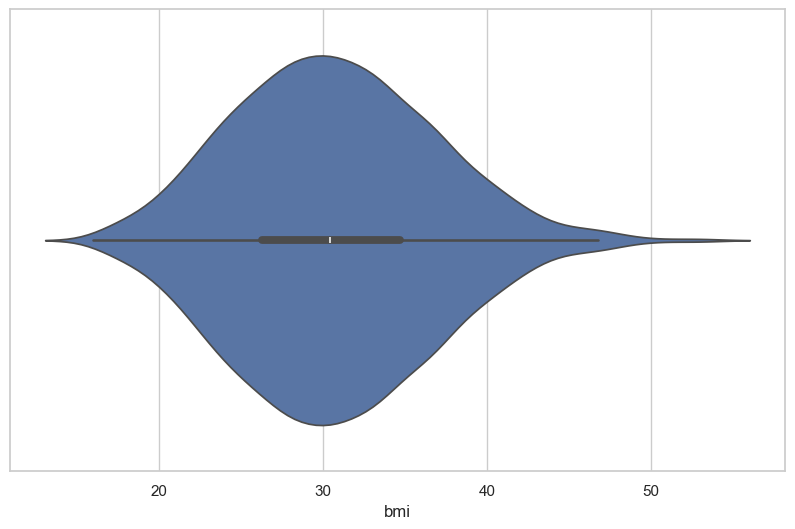

In [97]:
ax1 = sb.violinplot(x='bmi', data=regression_dataset)

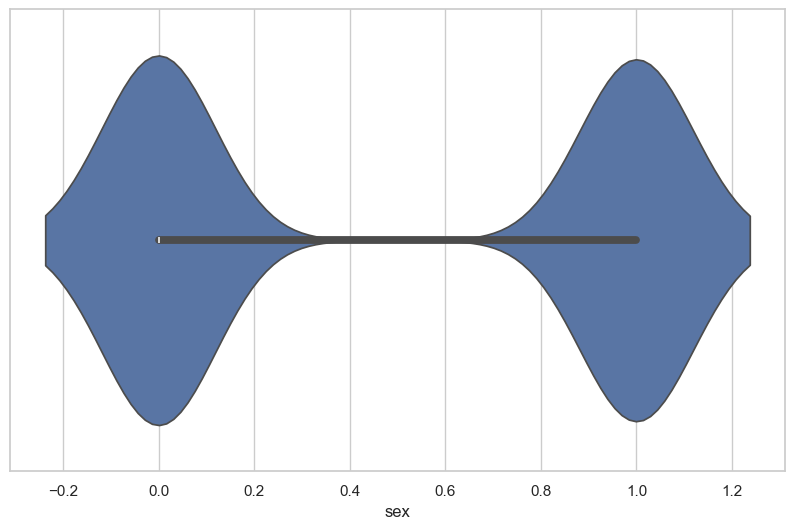

In [98]:
ax1 = sb.violinplot(x='sex', data=regression_dataset)

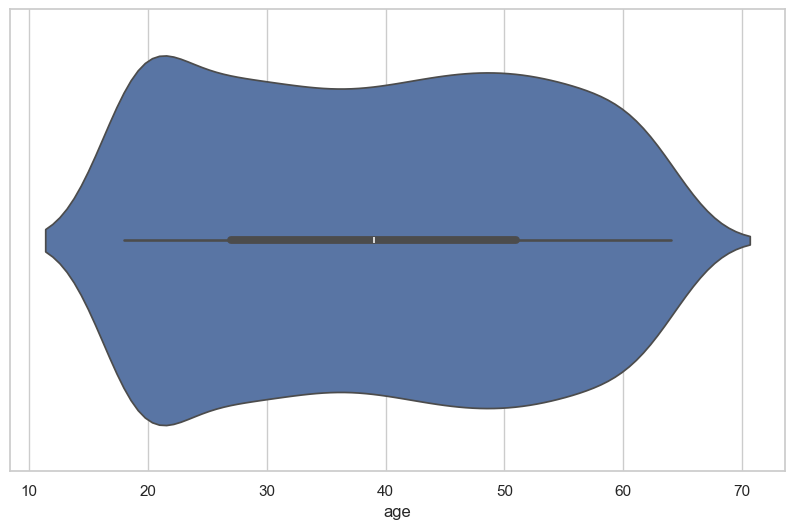

In [99]:
ax1 = sb.violinplot(x='age', data=regression_dataset)

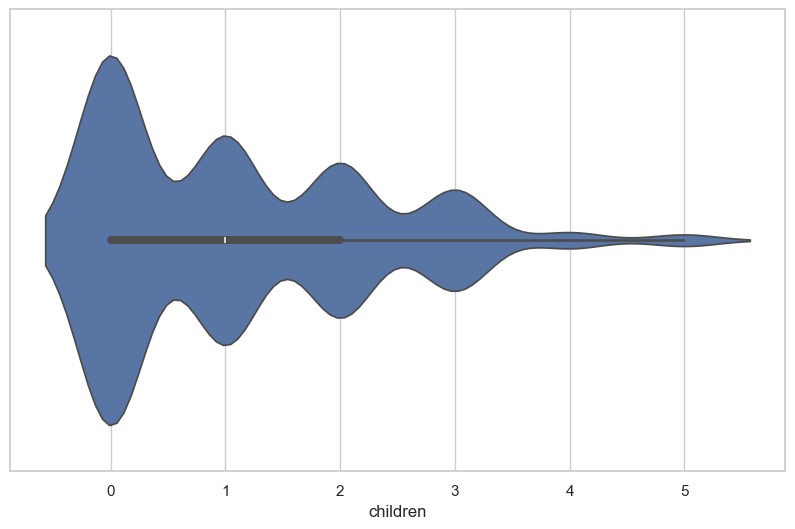

In [100]:
ax2 = sb.violinplot(x='children', data=regression_dataset)

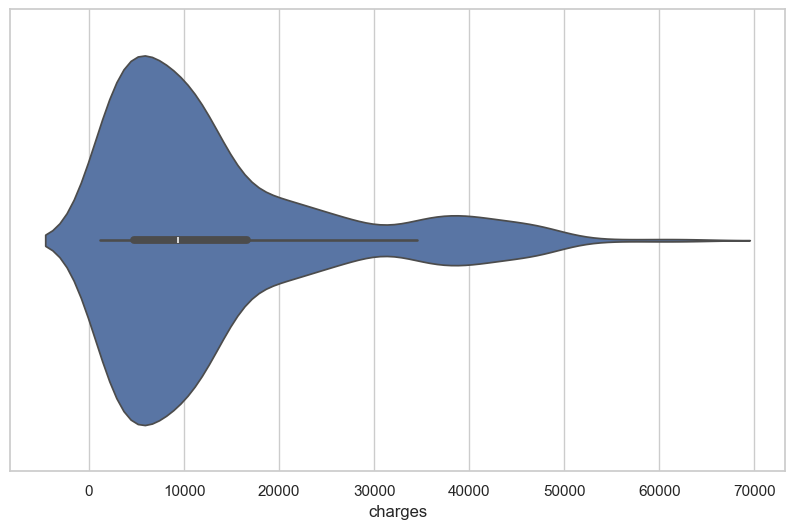

In [101]:
ax3 = sb.violinplot(x='charges', data=regression_dataset)

<h3>Correlation Analysis</h3>
PRedictors are weakly correlated between each other but there is significant impact of age and smoking on the charges size.

In [102]:
#different corr
corr = regression_dataset.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,-0.012027,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.014144,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.162590,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,-0.035115,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.069008,0.787251
region,-0.012027,-0.014144,0.162590,-0.035115,0.069008,1.000000,0.077042
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,0.077042,1.000000


In [103]:
corr2 = regression_dataset.corr(method='kendall')
corr2.style.background_gradient(cmap='coolwarm')

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.017186,0.073273,0.043253,-0.020821,-0.012925,0.475302
sex,0.017186,1.000000,-0.036630,-0.014317,-0.076185,-0.013036,-0.007751
bmi,0.073273,-0.036630,1.000000,0.011562,0.001801,0.107854,0.082524
children,0.043253,-0.014317,0.011562,1.000000,0.015231,-0.024557,0.103107
smoker,-0.020821,-0.076185,0.001801,0.015231,1.000000,0.063291,0.541916
region,-0.012925,-0.013036,0.107854,-0.024557,0.063291,1.000000,0.035778
charges,0.475302,-0.007751,0.082524,0.103107,0.541916,0.035778,1.000000


In [104]:
corr3 = regression_dataset.corr(method='spearman')
corr3.style.background_gradient(cmap='coolwarm')

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020809,0.107736,0.056992,-0.025210,-0.017172,0.534392
sex,0.020809,1.000000,-0.044802,-0.015589,-0.076185,-0.014277,-0.009490
bmi,0.107736,-0.044802,1.000000,0.015607,0.002203,0.148024,0.119396
children,0.056992,-0.015589,0.015607,1.000000,0.016583,-0.029366,0.133339
smoker,-0.025210,-0.076185,0.002203,0.016583,1.000000,0.069320,0.663460
region,-0.017172,-0.014277,0.148024,-0.029366,0.069320,1.000000,0.046677
charges,0.534392,-0.009490,0.119396,0.133339,0.663460,0.046677,1.000000


<h2>Feature Engineering</h2>

In [105]:
regression_dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,0,30.97,3,0,1,10600.5483
1334,18,1,31.92,0,0,2,2205.9808
1335,18,1,36.85,0,0,3,1629.8335
1336,21,1,25.80,0,0,0,2007.9450
1337,61,1,29.07,0,1,1,29141.3603


In [106]:
X.tail()

,age,sex,bmi,children,smoker,region,age^2,bmi^2
1333,50,0,30.97,3,0,1,2500.0,959.1409
1334,18,1,31.92,0,0,2,324.0,1018.8864
1335,18,1,36.85,0,0,3,324.0,1357.9225
1336,21,1,25.80,0,0,0,441.0,665.6400
1337,61,1,29.07,0,1,1,3721.0,845.0649


In [107]:
age_bins = [0, 25, 35, 45, 55, 65, 100]  # 0-25, 26-35, etc.
age_labels = ["0_25", "26_35", "36_45", "46_55", "56_65", "65"]
X["age_group"] = pd.cut(X["age"], bins=age_bins, labels=age_labels, right=True)

bmi_bins = [0, 18.5, 24.9, 29.9, 100]  # underweight, normal, overweight, obese
bmi_labels = ["underweight", "normal", "overweight", "obese"]
X["bmi_category"] = pd.cut(X["bmi"], bins=bmi_bins, labels=bmi_labels, right=True)


In [108]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


numeric_features = ["age", "bmi", "children"]
categorical_features = ["sex", "smoker", "region"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

In [109]:
X.tail()

,age,sex,bmi,children,smoker,region,age^2,bmi^2,age_group,bmi_category
1333,50,0,30.97,3,0,1,2500.0,959.1409,46_55,obese
1334,18,1,31.92,0,0,2,324.0,1018.8864,0_25,obese
1335,18,1,36.85,0,0,3,324.0,1357.9225,0_25,obese
1336,21,1,25.80,0,0,0,441.0,665.6400,0_25,overweight
1337,61,1,29.07,0,1,1,3721.0,845.0649,56_65,overweight


In [110]:
# Initialize scaler
scaler = StandardScaler()

# Fit scaler on numeric features of X
X_numeric_scaled = scaler.fit_transform(X[numeric_features])

# Convert back to DataFrame if you want
X_scaled_df = pd.DataFrame(X_numeric_scaled, columns=numeric_features, index=X.index)

# Replace original numeric columns with scaled values
X[numeric_features] = X_scaled_df

print(X.tail())

           age  sex       bmi  children  smoker  region   age^2      bmi^2  \
1333  0.768473    0  0.050297  1.580926       0       1  2500.0   959.1409   
1334 -1.509965    1  0.206139 -0.908614       0       2   324.0  1018.8864   
1335 -1.509965    1  1.014878 -0.908614       0       3   324.0  1357.9225   
1336 -1.296362    1 -0.797813 -0.908614       0       0   441.0   665.6400   
1337  1.551686    1 -0.261388 -0.908614       1       1  3721.0   845.0649   

     age_group bmi_category  
1333     46_55        obese  
1334      0_25        obese  
1335      0_25        obese  
1336      0_25   overweight  
1337     56_65   overweight  


<h3>Even though the smoker column is imbalanced, there is no stronge noise or overfitting risk</h3>

In [111]:
from sklearn.feature_selection import mutual_info_regression

imbalance_ratio = X['smoker'].value_counts(normalize=True)
mi = mutual_info_regression(X[['smoker']], y)

print(f"Imbalance ratio: {imbalance_ratio.to_dict()}")
print(f"Mutual information with target: {mi[0]:.4f}")

Imbalance ratio: {0: 0.7952167414050823, 1: 0.20478325859491778}
Mutual information with target: 0.3692


<h2>One hot encoding binary and nominal variables.</h2>

In [112]:
df_pandas_encoded = pd.get_dummies(X, columns=['sex', 'region', 'smoker', 'age_group', 'bmi_category'], drop_first=True)
encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(X[['sex', 'region', 'smoker', 'age_group', 'bmi_category']])
one_hot_df = pd.DataFrame(one_hot_encoded, 
                          columns=encoder.get_feature_names_out(['sex', 'region', 'smoker', 'age_group', 'bmi_category']))

X = pd.concat([X.drop(['sex', 'region', 'smoker', 'age_group', 'bmi_category'], axis=1), one_hot_df], axis=1)


In [113]:
print(X.tail())

           age       bmi  children   age^2      bmi^2  sex_0  sex_1  region_0  \
1333  0.768473  0.050297  1.580926  2500.0   959.1409    1.0    0.0       0.0   
1334 -1.509965  0.206139 -0.908614   324.0  1018.8864    0.0    1.0       0.0   
1335 -1.509965  1.014878 -0.908614   324.0  1357.9225    0.0    1.0       0.0   
1336 -1.296362 -0.797813 -0.908614   441.0   665.6400    0.0    1.0       1.0   
1337  1.551686 -0.261388 -0.908614  3721.0   845.0649    0.0    1.0       0.0   

      region_1  region_2  ...  smoker_1  age_group_0_25  age_group_26_35  \
1333       1.0       0.0  ...       0.0             0.0              0.0   
1334       0.0       1.0  ...       0.0             1.0              0.0   
1335       0.0       0.0  ...       0.0             1.0              0.0   
1336       0.0       0.0  ...       0.0             1.0              0.0   
1337       1.0       0.0  ...       1.0             0.0              0.0   

      age_group_36_45  age_group_46_55  age_group_56_65 

<h3>Train test validation split</h3>

In [114]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_log, 
                                   test_size=0.30, 
                                   shuffle=True,
                                   random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test,
                                   test_size=0.50, 
                                   shuffle=True,
                                   random_state=42)

<h3>Should we scale and/or normalize the data?</h3>
Not really. It may distort feature importances and make interpretability harder. Decision trees and ensemble methods built from them split data based on feature thresholds. However for the sake of xgboost we will do this

<h2>Model training - Decision Tree Regressor, XGBoost Regression, Ensemble Random Forest Regressor</h2>

In [115]:
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

<h2>Random Forest Model</h2>

In [116]:
tree_regressor = RandomForestRegressor(max_depth=4, random_state=42, bootstrap=True, oob_score=True, n_jobs=8)
tree_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, n_jobs=8, oob_score=True, random_state=42)

In [124]:
from sklearn.model_selection import cross_val_score

y_pred = tree_regressor.predict(X_test)

y_pred_log = np.expm1(y_pred)

mse = mean_squared_error(np.expm1(y_test), y_pred_log)
mae = mean_absolute_error(np.expm1(y_test), y_pred_log)
mape = mean_absolute_percentage_error(np.expm1(y_test), y_pred_log)
r2 = r2_score(np.expm1(y_test), y_pred_log)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Absolute Percentage Error: {mape:.4f}")
print(f"R2 Error: {r2:.4f}")


Mean Squared Error: 20744908.4791
Mean Absolute Error: 2251.7616
Mean Absolute Percentage Error: 0.1824
R2 Error: 0.8632


In [111]:
!pip install optuna

In [125]:
import optuna
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import LeaveOneOut, KFold

In [126]:
def objective(trial):
    params ={
        'max_depth': trial.suggest_int("max_depth", 3, 32, log=True),
        'min_samples_split': trial.suggest_int("min_samples_split", 5, 10),
        'min_samples_leaf': trial.suggest_float('min_samples_leaf', 0.01, 0.5),
        'min_weight_fraction_leaf': trial.suggest_float('min_weight_fraction_leaf', 0.01, 0.50),
        'ccp_alpha': trial.suggest_float('ccp_alpha', 0.01, 0.99),
    }

    clf=RandomForestRegressor(**params, random_state=42, bootstrap=True, oob_score=True, n_jobs=8)
    clf.fit(X_train, y_train)

    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error')

    #pred = clf.predict(X_val)
    #mse = mean_squared_error(y_val, pred)
    return -scores.mean()

In [127]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=121)

[I 2025-12-10 16:21:13,739] A new study created in memory with name: no-name-1cc613ee-9387-4d22-b810-8988cb5b2e44
[I 2025-12-10 16:21:15,385] Trial 0 finished with value: 0.6476829416263417 and parameters: {'max_depth': 3, 'min_samples_split': 6, 'min_samples_leaf': 0.21234247342496562, 'min_weight_fraction_leaf': 0.11294040732048695, 'ccp_alpha': 0.10193741121971117}. Best is trial 0 with value: 0.6476829416263417.
[I 2025-12-10 16:21:17,201] Trial 1 finished with value: 0.5540934871643374 and parameters: {'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 0.10135640943753896, 'min_weight_fraction_leaf': 0.02844888787863365, 'ccp_alpha': 0.2692229951526161}. Best is trial 1 with value: 0.5540934871643374.
[I 2025-12-10 16:21:19,095] Trial 2 finished with value: 0.7419656488611571 and parameters: {'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 0.029878734367260344, 'min_weight_fraction_leaf': 0.4768634945182359, 'ccp_alpha': 0.5416781754596027}. Best is trial 1 wi

In [128]:
print("Best random forest hyperparameters:", study.best_params)
print("Best random forest score:", study.best_value)

Best random forest hyperparameters: {'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 0.04682340489079327, 'min_weight_fraction_leaf': 0.13838764625123962, 'ccp_alpha': 0.012117028633303389}
Best random forest score: 0.2894492182731048


In [129]:
optuna.visualization.plot_optimization_history(study)

In [130]:
optuna.visualization.plot_param_importances(study)

<h3>Random Forest Results Validation</h3>

In [132]:
best_random_model = RandomForestRegressor(**study.best_params, random_state=42)
best_random_model.fit(X_train, y_train)

random_pred = best_random_model.predict(X_train)

random_pred_log = np.expm1(random_pred)

random_mae = mean_absolute_error(np.expm1(y_train), random_pred_log)
random_mape = mean_absolute_percentage_error(np.expm1(y_train), random_pred_log)
random_r2 = r2_score(np.expm1(y_train), random_pred_log)
print("Random Forest Training MAE: ", random_mae)
print("Random Forest Training MAPE: ", random_mape)
print("Random Forest Training R2: ", random_r2)

val_pred = best_random_model.predict(X_val)

val_pred_log = np.expm1(val_pred)

val_mae = mean_absolute_error(np.expm1(y_val), val_pred_log)
random_mape = mean_absolute_percentage_error(np.expm1(y_val), val_pred_log)
random_r2 = r2_score(np.expm1(y_val), val_pred_log)
print("Random Forest Validation MAE: ", val_mae)
print("Random Forest Validation MAPE: ", random_mape)
print("Random Forest Validation R2: ",random_r2)

Random Forest Training MAE:  4007.291552278762
Random Forest Training MAPE:  0.27192717339865036
Random Forest Training R2:  0.6752668399286685
Random Forest Validation MAE:  3600.7394295680797
Random Forest Validation MAPE:  0.26268855333864805
Random Forest Validation R2:  0.7088064723220852


In [143]:
def RFtest(best_model):
    test_pred = best_model.predict(X_test)

    test_pred_log = np.expm1(test_pred)
    test_mse = mean_squared_error(np.expm1(y_test), test_pred_log)
    test_mae = mean_absolute_error(np.expm1(y_test), test_pred_log)
    test_r2 = r2_score(np.expm1(y_test), test_pred_log)
    test_mape = mean_absolute_percentage_error(np.expm1(y_test), test_pred_log)

    print("Test MSE:", test_mse)
    print("Test MAE:", test_mae)
    print("Test R2:", test_r2)
    print("Test MAPE:", test_mape)

    return [test_mse, test_mae, test_mape, test_r2, test_pred]

RFtest(best_model=best_random_model)

Test MSE: 45357301.21974924
Test MAE: 3898.025010358621
Test R2: 0.7009063807321374
Test MAPE: 0.2588235186770191


[45357301.21974924,
 3898.025010358621,
 0.2588235186770191,
 0.7009063807321374,
 array([ 8.11884244,  9.43197215,  8.45387049,  9.43197215,  8.45387049,
        10.29315089,  8.16293194, 10.29315089, 10.29315089,  8.97937489,
         9.3701294 ,  8.92362899,  8.16293194,  9.36097936,  8.74642964,
         9.43197215,  8.40978099, 10.29315089,  8.45387049,  9.36097936,
         9.43197215, 10.29315089,  8.42292112,  9.0854222 ,  8.98510566,
         8.64460847,  9.3701294 ,  9.43197215,  8.93117331,  9.43197215,
         9.39147196,  9.43197215, 10.29315089, 10.29315089, 10.29315089,
         9.43197215, 10.29315089,  9.43197215, 10.29315089,  9.39147196,
         8.91697433,  9.39147196,  8.42292112,  9.43197215,  8.45387049,
        10.29315089,  9.39147196,  8.1535484 ,  7.86260986,  8.45387049,
         8.1535484 ,  9.3701294 ,  7.86260986,  8.89673157,  9.43197215,
        10.29315089,  8.93117331,  8.91697433,  8.92362899,  7.86260986,
         8.43720802,  9.43197215,  9.08542

In [135]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]
std = np.std([tree.feature_importances_ for tree in best_random_model.estimators_], axis=0)


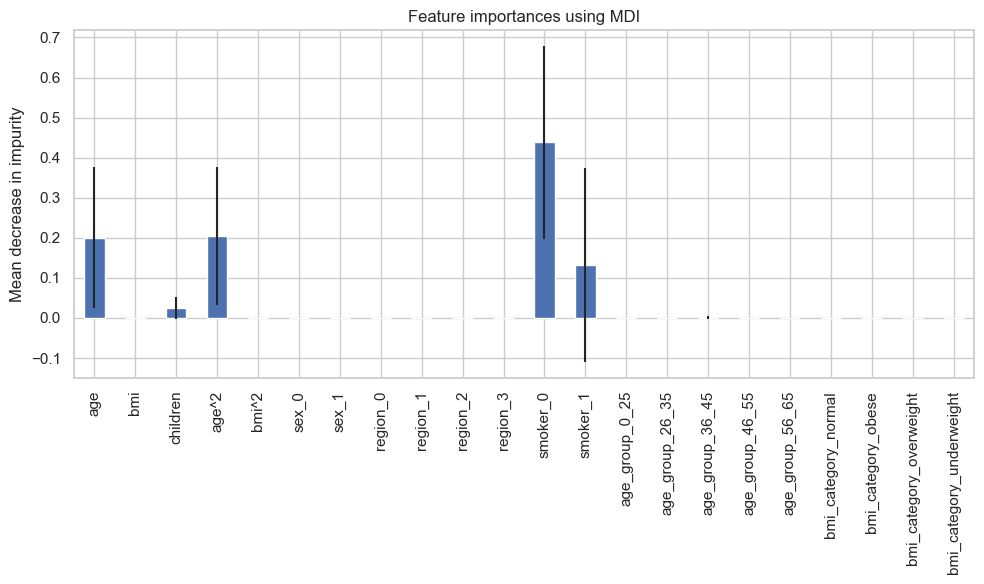

In [136]:
import pandas as pd
forest_importances = pd.Series(best_random_model.feature_importances_, index=list(X))

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

<h2>Training Random Forest on the best parameters</h2>

In [137]:
best_random_model = RandomForestRegressor(**study.best_params, random_state=42)

best_random_model.fit(X_train, y_train)

test_pred = best_random_model.predict(X_test)
test_mse = mean_squared_error(np.expm1(y_test), np.expm1(test_pred))
print("Test MSE:", test_mse)

Test MSE: 45357301.21974924


<h2>Ensemble Decision Tree Bagging</h2>

In [144]:
from sklearn.ensemble import BaggingRegressor, _bagging
print(_bagging.MAX_INT)

2147483647


In [145]:
from sklearn.svm import SVR

def bagging_objective(trial):
    params ={
        'max_samples': trial.suggest_int("max_samples", 5, 10),
        'max_features': trial.suggest_int('max_features', 3, 10),
        'n_estimators': trial.suggest_int('n_estimators', 3, 10),
    }

    clf=BaggingRegressor(**params, random_state=42, oob_score = True)
    clf.fit(X_train, y_train)

    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error')

    return -scores.mean()

In [146]:
bagging_study = optuna.create_study(direction="minimize")
bagging_study.optimize(bagging_objective, n_trials=120)

[I 2025-12-10 16:30:05,486] A new study created in memory with name: no-name-df815e23-8738-49ba-b372-6190e76bd989
[I 2025-12-10 16:30:05,645] Trial 0 finished with value: 0.6050738256842593 and parameters: {'max_samples': 7, 'max_features': 7, 'n_estimators': 10}. Best is trial 0 with value: 0.6050738256842593.
[I 2025-12-10 16:30:05,772] Trial 1 finished with value: 0.6452777553176161 and parameters: {'max_samples': 6, 'max_features': 6, 'n_estimators': 9}. Best is trial 0 with value: 0.6050738256842593.
[I 2025-12-10 16:30:05,839] Trial 2 finished with value: 0.7420949950965623 and parameters: {'max_samples': 5, 'max_features': 4, 'n_estimators': 5}. Best is trial 0 with value: 0.6050738256842593.
[I 2025-12-10 16:30:05,922] Trial 3 finished with value: 0.7531588028766047 and parameters: {'max_samples': 10, 'max_features': 3, 'n_estimators': 4}. Best is trial 0 with value: 0.6050738256842593.
[I 2025-12-10 16:30:06,002] Trial 4 finished with value: 0.6662794586735457 and parameters: 

In [147]:
optuna.visualization.plot_optimization_history(bagging_study)

In [148]:
optuna.visualization.plot_param_importances(bagging_study)

In [149]:
best_model = BaggingRegressor(**bagging_study.best_params, random_state=42)

best_model.fit(X_train, y_train)

bagging_pred = best_model.predict(X_train)

bagging_mae = mean_absolute_error(np.expm1(y_train), np.expm1(bagging_pred))
bagging_mape = mean_absolute_percentage_error(np.expm1(y_train), np.expm1(bagging_pred))
bagging_r2 = r2_score(np.expm1(y_train), np.expm1(bagging_pred))
print("Bagging Decision Tree Training MAE: ", bagging_mae)
print("Bagging Decision Tree Training MAPE: ", bagging_mape)
print("Bagging Decision Tree Training R2: ", bagging_r2)

val_pred = best_random_model.predict(X_val)
val_mae = mean_absolute_error(np.expm1(y_val), np.expm1(val_pred))
random_mape = mean_absolute_percentage_error(np.expm1(y_val), np.expm1(val_pred))
random_r2 = r2_score(np.expm1(y_val), np.expm1(val_pred))
print("Bagging Decision Tree Validation MAE: ", val_mae)
print("Bagging Decision Tree Validation MAPE: ", random_mape)
print("Bagging Decision Tree Validation R2: ",random_r2)

Bagging Decision Tree Training MAE:  6553.03934626801
Bagging Decision Tree Training MAPE:  0.6511261759181196
Bagging Decision Tree Training R2:  0.22204057802340882
Bagging Decision Tree Validation MAE:  3600.7394295680797
Bagging Decision Tree Validation MAPE:  0.26268855333864805
Bagging Decision Tree Validation R2:  0.7088064723220852


In [150]:
def DTtest(best_model):
    test_pred = best_model.predict(X_test)
    test_mse = mean_squared_error(np.expm1(y_test), np.expm1(test_pred))
    test_mae = mean_absolute_error(np.expm1(y_test), np.expm1(test_pred))
    test_r2 = r2_score(np.expm1(y_test), np.expm1(test_pred))
    test_mape = mean_absolute_percentage_error(np.expm1(y_test), np.expm1(test_pred))

    print("Test MSE:", test_mse)
    print("Test MAE:", test_mae)
    print("Test R2:", test_r2)
    print("Test MAPE:", test_mape)

    return [test_mse, test_mae, test_mape, test_r2, test_pred]

DTtest(best_model=best_model)

Test MSE: 115817478.76371594
Test MAE: 6747.761098507723
Test R2: 0.23628020260527038
Test MAPE: 0.637302670444049


[115817478.76371594,
 6747.761098507723,
 0.637302670444049,
 0.23628020260527038,
 array([8.84767658, 9.22764603, 8.7492612 , 8.89087878, 8.79630741,
        9.3465039 , 8.36247624, 9.55120425, 9.49917683, 8.95556001,
        9.5438312 , 8.74235428, 8.84494439, 9.41347082, 8.88956331,
        8.8367921 , 9.06829342, 9.59974571, 8.54156714, 9.11770845,
        9.11525332, 9.94412028, 8.60185613, 9.22251498, 9.03836085,
        8.91580506, 9.22782744, 8.72751168, 8.78122117, 9.04888976,
        9.03053842, 9.17097334, 9.74474774, 9.56890824, 9.34732149,
        9.57312162, 9.59126739, 9.14086755, 9.33031419, 9.23217447,
        9.13640365, 9.29472609, 8.86324509, 9.41892209, 8.82879767,
        9.71289659, 9.17907992, 9.06200655, 8.58379597, 8.60104688,
        9.05206503, 9.24226904, 9.00507644, 8.9484631 , 8.90781425,
        9.5321568 , 8.84901094, 8.82390251, 8.90292693, 8.36352145,
        8.72168392, 9.048657  , 8.98949975, 8.8200666 , 8.93821974,
        9.51751682, 8.79520588, 8

Test MSE: 115817478.76371594
Test MAE: 6747.761098507723
Test R2: 0.23628020260527038
Test MAPE: 0.637302670444049


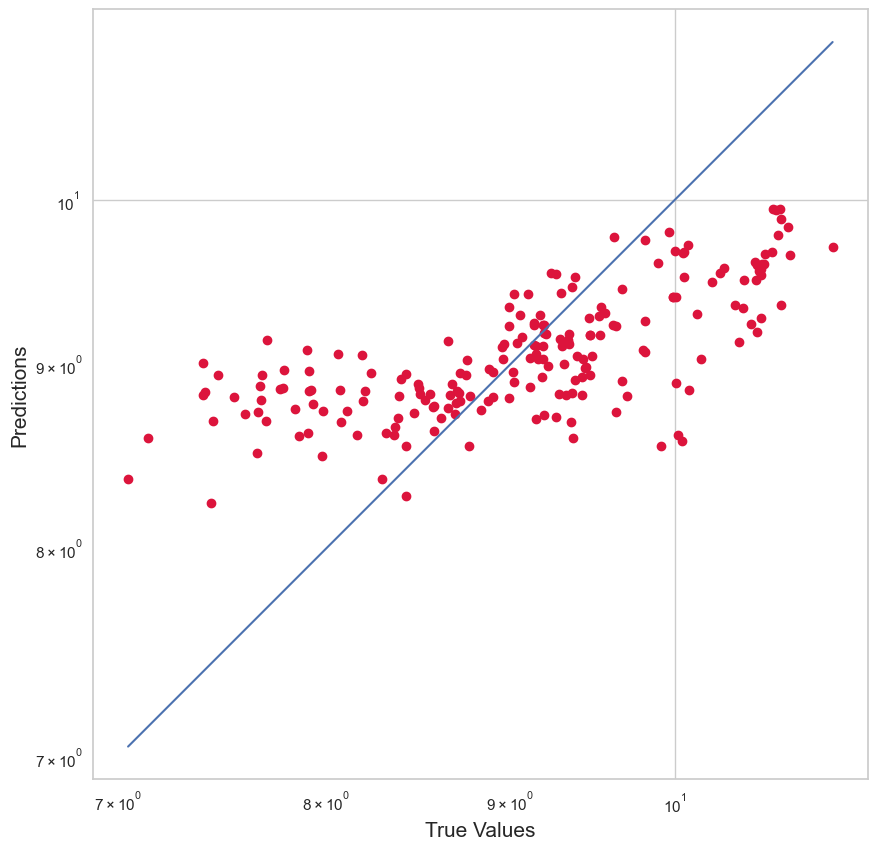

In [151]:
y_pred = DTtest(best_model)

plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred[4], c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred[4]), max(y_test))
p2 = min(min(y_pred[4]), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

<h2>XGBoost Regressor</h2>

In [45]:
!pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/72.0 MB 2.6 MB/s eta 0:00:28
    --------------------------------------- 1.6/72.0 MB 2.9 MB/s eta 0:00:25
   - -------------------------------------- 2.4/72.0 MB 3.1 MB/s eta 0:00:23
   - -------------------------------------- 2.9/72.0 MB 3.1 MB/s eta 0:00:23
   -- ------------------------------------- 3.9/72.0 MB 3.3 MB/s eta 0:00:21
   -- ------------------------------------- 5.0/72.0 MB 3.6 MB/s eta 0:00:19
   --- ------------------------------------ 6.3/72.0 MB 4.1 MB/s eta 0:00:17
   ---- ----------------------------------- 8.1/72.0 MB 4.5 MB/s eta 0:00:15
   ----- ---------------------------------- 10.0/72.0 MB 4.9 MB/s eta 0:00:13
   ------ --------------------------------- 11.5/72.0 MB 5.2 MB/s eta 0:00:12
   ------- -------------------------------- 12.8/72.0 MB 5.3 MB/s eta 0:00:12
   -------

In [152]:
import xgboost

<h3>Basic XGBoost Model</h3>

In [153]:
xgb_model = xgboost.XGBRegressor(n_estimators=10, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, feature_weights=None, gamma=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None, ...)

In [154]:
test_pred = xgb_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)
test_mae = mean_absolute_error(y_test, test_pred)
test_mape = mean_absolute_percentage_error(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)

print("Test MSE:", test_mse)
print("Test MAE:", test_mae)
print("Test MAPE:", test_mape)
print("Test R2:", test_r2)

Test MSE: 0.22458192307345679
Test MAE: 0.3509803732678428
Test MAPE: 0.0392084661085726
Test R2: 0.7313933001925401


In [155]:
def xgb_objective(trial):
    params ={
        'n_estimators': trial.suggest_int("n_estimators", 100, 500, log=True),
        'max_depth': trial.suggest_int("max_depth", 2, 10),
        'eta': trial.suggest_float("eta", 0.1, 0.99),
        'subsample':  trial.suggest_float('subsample', 0.2, 0.99),
        'colsample_bytree':  trial.suggest_float('colsample_bytree', 0.1, 0.99),
        'gamma': trial.suggest_float('gamma', 0.1, 0.99),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.1, 0.99),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.1, 0.99),
        #'booster': trial.suggest_categorical('booster', ['dart', 'linear'])

    }
    clf = xgboost.XGBRegressor(**params, random_state=42, n_jobs=8)
    clf.fit(X_train, y_train, verbose=True)

    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error')

    #pred = clf.predict(X_val)
    #mse = mean_squared_error(y_val, pred)
    return -scores.mean()

In [156]:
xgb_study = optuna.create_study(direction="minimize")
xgb_study.optimize(xgb_objective, n_trials=97)

[I 2025-12-10 16:33:58,548] A new study created in memory with name: no-name-18f1f38f-bfbf-4fe8-b2d2-a46e2f7656ab
[I 2025-12-10 16:33:59,056] Trial 0 finished with value: 0.3550849956410009 and parameters: {'n_estimators': 164, 'max_depth': 7, 'eta': 0.8059726225666893, 'subsample': 0.4523188486328337, 'colsample_bytree': 0.13028471546834355, 'gamma': 0.22355865512036988, 'reg_alpha': 0.6582674225326707, 'reg_lambda': 0.20975414465330633}. Best is trial 0 with value: 0.3550849956410009.
[I 2025-12-10 16:33:59,446] Trial 1 finished with value: 0.25646357766374056 and parameters: {'n_estimators': 132, 'max_depth': 2, 'eta': 0.19205574152719404, 'subsample': 0.7708386872983972, 'colsample_bytree': 0.13196373093917385, 'gamma': 0.24668843089950282, 'reg_alpha': 0.3071238041857295, 'reg_lambda': 0.4787965809766337}. Best is trial 1 with value: 0.25646357766374056.
[I 2025-12-10 16:33:59,908] Trial 2 finished with value: 0.2762521934791833 and parameters: {'n_estimators': 128, 'max_depth': 1

In [157]:
optuna.visualization.plot_optimization_history(xgb_study)

In [158]:
optuna.visualization.plot_param_importances(xgb_study)

In [159]:
trial = xgb_study.trials[93] #best set of parameters

In [160]:
best_xgb_model = xgboost.XGBRegressor(**trial.params, random_state=42)

In [161]:
import joblib

joblib.dump(best_xgb_model, "xgb1.joblib.dat")


['xgb1.joblib.dat']

In [162]:
from sklearn.metrics import root_mean_squared_error

loaded_model = joblib.load("xgb1.joblib.dat")
best_xgb_model.fit(X_train, y_train)

xgb_pred = best_xgb_model.predict(X_train)
xgb_mae = mean_absolute_error(np.expm1(y_train), np.expm1(xgb_pred))
xgb_mape = mean_absolute_percentage_error(np.expm1(y_train), np.expm1(xgb_pred))
xgb_r2 = r2_score(np.expm1(y_train), np.expm1(xgb_pred))

print("XGB TRAINING MAE: ", xgb_mae)
print("XGB TRAINING MAPE: ", xgb_mape)
print("XGB TRAINING R2: ", xgb_r2)

val_pred = best_xgb_model.predict(X_val)

val_mae = mean_absolute_error(np.expm1(y_val), np.expm1(val_pred))
val_mape = mean_absolute_percentage_error(np.expm1(y_val), np.expm1(val_pred))
val_r2 = r2_score(np.expm1(y_val), np.expm1(val_pred))

print("XGB VAL MAE: ", val_mae)
print("XGB VAL MAPE: ", val_mape)
print("XGB VAL R2: ", val_r2)


XGB TRAINING MAE:  1912.2265924868964
XGB TRAINING MAPE:  0.14118881140626993
XGB TRAINING R2:  0.8828752052650378
XGB VAL MAE:  2032.7827006260493
XGB VAL MAPE:  0.18368224869111255
XGB VAL R2:  0.8723335396731887


In [163]:
test_pred = best_xgb_model.predict(X_test)

def XGBtest(best_model):
    test_pred = best_model.predict(X_test)

    test_mse = mean_squared_error(np.expm1(y_test), np.expm1(test_pred))
    test_mae = mean_absolute_error(np.expm1(y_test), np.expm1(test_pred))
    test_r2 = r2_score(np.expm1(y_test), np.expm1(test_pred))
    test_mape = mean_absolute_percentage_error(np.expm1(y_test), np.expm1(test_pred))

    print("Test MSE:", test_mse)
    print("Test MAE:", test_mae)
    print("Test R2:", test_r2)
    print("Test MAPE:", test_mape)

    return [test_mse, test_mae, test_mape, test_r2, test_pred]

XGBtest(best_model=best_xgb_model)

Test MSE: 19286290.25132371
Test MAE: 2011.796850959072
Test R2: 0.8728229811211243
Test MAPE: 0.154289721033746


[19286290.25132371,
 2011.796850959072,
 0.154289721033746,
 0.8728229811211243,
 array([ 7.9263234,  9.577676 ,  8.495719 ,  9.449528 ,  8.648197 ,
        10.494776 ,  8.229784 , 10.608135 , 10.533366 ,  9.073092 ,
         9.316189 ,  8.86278  ,  8.180949 ,  9.227585 ,  8.812592 ,
         9.426133 ,  8.455121 , 10.5914135,  8.493493 ,  9.185353 ,
         9.38353  , 10.6787405,  8.196158 ,  9.073728 ,  9.160475 ,
         8.588665 ,  9.3039875,  9.641685 ,  8.803831 ,  9.536948 ,
         9.282195 ,  9.554081 ,  9.90504  , 10.614088 , 10.426482 ,
         9.524491 , 10.652765 ,  9.445685 , 10.432798 ,  9.314731 ,
         8.868501 ,  9.333011 ,  8.81107  ,  9.402444 ,  8.541092 ,
        10.1153555,  9.429669 ,  8.317352 ,  7.1936626,  8.412963 ,
         8.930446 ,  9.328226 ,  7.584698 ,  9.065793 ,  9.441754 ,
        10.5914135,  8.8139105,  8.958697 ,  8.966793 ,  7.276478 ,
         8.520406 ,  9.391019 ,  9.272667 ,  8.587696 ,  7.578206 ,
         9.411163 ,  7.863144 ,  8.

The model explains 87% of variance, the average deviation from real value is 20%, which results in approximately $2011 of charge size deviation.

Test MSE: 19286290.25132371
Test MAE: 2011.796850959072
Test R2: 0.8728229811211243
Test MAPE: 0.154289721033746


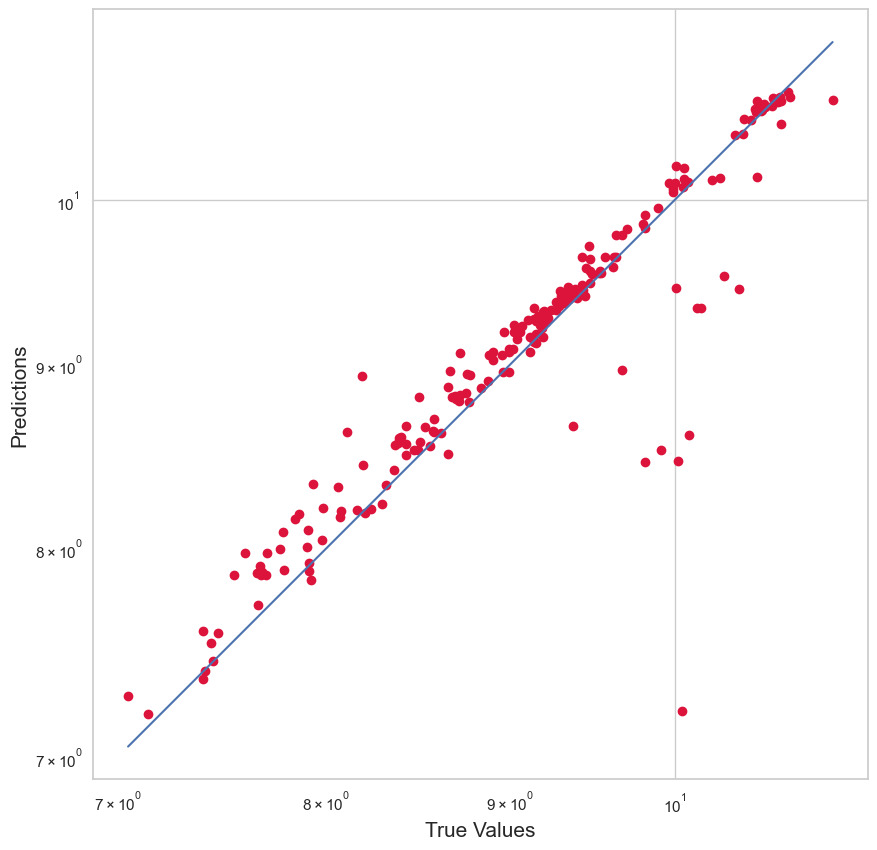

In [164]:
y_pred = XGBtest(best_xgb_model)

plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred[4], c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred[4]), max(y_test))
p2 = min(min(y_pred[4]), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

<h3>The model has interesting impact on the final results</h3>

In [168]:
!pip install shap scipy

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

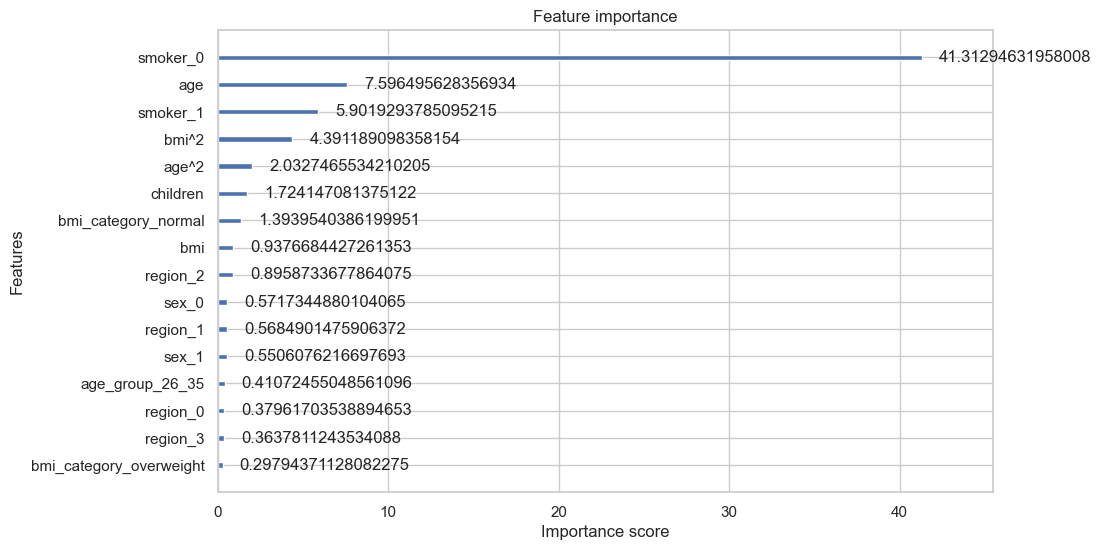

In [170]:
from xgboost import plot_importance
plot_importance(best_xgb_model, importance_type='gain')

<h3>Experimental part - training model on smaller number of predictors</h3>

In [171]:
from sklearn.feature_selection import RFECV
from xgboost import XGBRegressor

model = best_xgb_model
selector = RFECV(model, step=1, cv=5, scoring='neg_root_mean_squared_error')
selector.fit(X_train, y_train)
X_selected = X_train.loc[:, selector.support_]

In [172]:
def xgb_objective_exp(trial):
    params ={
        'n_estimators': trial.suggest_int("n_estimators", 100, 500, log=True),
        'max_depth': trial.suggest_int("max_depth", 2, 10),
        'eta': trial.suggest_float("eta", 0.1, 0.99),
        'subsample':  trial.suggest_float('subsample', 0.2, 0.99),
        'colsample_bytree':  trial.suggest_float('colsample_bytree', 0.1, 0.99),
        'gamma': trial.suggest_float('gamma', 0.1, 0.99),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.1, 0.99),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.1, 0.99),
        #'booster': trial.suggest_categorical('booster', ['dart', 'linear'])

    }
    clf = xgboost.XGBRegressor(**params, random_state=42, n_jobs=8)
    clf.fit(X_selected, y_train, verbose=True)

    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(clf, X_selected, y_train, cv=cv, scoring='neg_mean_absolute_error')

    return -scores.mean()

In [173]:
xgb_study = optuna.create_study(direction="minimize")
xgb_study.optimize(xgb_objective_exp, n_trials=97)

[I 2025-12-10 16:41:35,048] A new study created in memory with name: no-name-cd2ef2c4-099d-4699-9852-acb4eb16cb2d
[I 2025-12-10 16:41:35,688] Trial 0 finished with value: 0.24018001993885824 and parameters: {'n_estimators': 337, 'max_depth': 6, 'eta': 0.40461310008972584, 'subsample': 0.40027833648332417, 'colsample_bytree': 0.3992112323674488, 'gamma': 0.7350696484192697, 'reg_alpha': 0.18922347551225663, 'reg_lambda': 0.27973350220828724}. Best is trial 0 with value: 0.24018001993885824.
[I 2025-12-10 16:41:36,502] Trial 1 finished with value: 0.23565542067246192 and parameters: {'n_estimators': 473, 'max_depth': 2, 'eta': 0.9058051410345912, 'subsample': 0.8212968432694361, 'colsample_bytree': 0.5772028635489379, 'gamma': 0.6659642824636339, 'reg_alpha': 0.6139167823412665, 'reg_lambda': 0.9087150277024786}. Best is trial 1 with value: 0.23565542067246192.
[I 2025-12-10 16:41:37,305] Trial 2 finished with value: 0.33074138963611743 and parameters: {'n_estimators': 220, 'max_depth': 

In [60]:
optuna.visualization.plot_optimization_history(xgb_study)

In [61]:
exp_xgb_model = xgboost.XGBRegressor(**trial.params, random_state=42)

<h3>The model does not improve upon removal of irrelevent features</h3>

<h2>Models exporting</h2>

In [174]:
import pickle

#export of random forest
with open("./models/rf_regressor.pkl", "wb") as f:
    pickle.dump(best_random_model, f)

#export og ensemble decision tree
with open("./models/dt_regressor.pkl", "wb") as f:
    pickle.dump(best_model, f)

#export of xgboost regressor
with open("./models/xgb_regressor.pkl", "wb") as f:
    pickle.dump(best_xgb_model, f)

<h2>Pipelining</h2>

In [57]:
xgb_pipeline = Pipeline([
    ('XGBRegressor', xgboost.XGBRegressor(**study.best_params, random_state=42))
])

xgb_pipeline.fit(X_train, y_train)
y_pred = xgb_pipeline.predict(X_test)

In [59]:
Bagging_pipeline = Pipeline([
    ('EDTree', BaggingRegressor(**bagging_study.best_params, random_state=42))
])

Bagging_pipeline.fit(X_train, y_train)
y_pred = Bagging_pipeline.predict(X_test)

NameError: name 'bagging_study' is not defined

In [34]:
RF_pipeline = Pipeline([
    ('model', RandomForestRegressor(
        random_state=42,
        bootstrap=True,
        oob_score=True,
        n_jobs=8,
    ))
])

RF_pipeline.fit(X_train, y_train)
y_pred = RF_pipeline.predict(X_test)


In [35]:
set_config(display="diagram")
RF_pipeline

Pipeline(steps=[('model',
                 RandomForestRegressor(n_jobs=8, oob_score=True,
                                       random_state=42))])

In [ ]:
Bagging_pipeline

In [ ]:
xgb_pipeline